In [62]:
import pandas as pd
import numpy as np
#for visualising
import matplotlib.pyplot as plt
import matplotlib.style as style
from statistics import mean
from sklearn import linear_model

def best_fit_line(xs,ys):
    slope = (((mean(xs)* mean(ys)) - mean(xs*ys))/(mean(xs*mean(xs))-mean(xs*xs)))
    y_intercept = mean(ys) - slope *mean(xs)
    return slope, y_intercept
df = pd.read_csv("weight-height.csv")
male_df =df[df["Gender"] == "Male"][:200]
male_df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
195,Male,72.294743,208.474866
196,Male,67.253325,180.779780
197,Male,75.944460,231.924749
198,Male,66.316232,170.593858


175.25


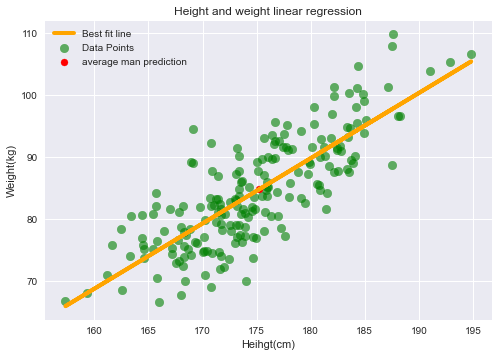

In [66]:
male_df["Height"] = male_df["Height"].apply(lambda x: x*2.54)
male_df["Weight"] = male_df["Weight"].apply(lambda x: x*0.45359273)
height_list = male_df["Height"].tolist()
weight_list = male_df["Weight"].tolist()
#conver to numpy list
xs = np.array(height_list, dtype=np.float64)
ys = np.array(weight_list, dtype=np.float64)
#plot outputs
style.use("seaborn") #enchance contrast
plt.scatter(xs,ys,label="Data Points", alpha=0.6,color="g", s=75)
plt.scatter(average_man_height, average_man_weight, label="average man prediction", color="red")
plt.plot(xs, regression_line, label="Best fit line", color='orange', linewidth =4)
plt.title("Height and weight linear regression")
plt.xlabel("Heihgt(cm)")
plt.ylabel("Weight(kg)")
plt.legend()
print (average_man_height)

# Calculate slope


In [60]:
#1st method own function
#calculated slope and y-intercept of the lists
#slope, y_intercept = best_fit_line(xs,ys)
#get the regression line from the calculated slope and y-intercept
#regression_line =[(slope * x)  + y_intercept for x in xs] 
#making predictions
#average_man_height = 175.25
#average_man_weight = (slope * average_man_height) + y_intercept

In [70]:
#2nd method
height_weight = linear_model.LinearRegression()
#train model
height_weight.fit(xs.reshape(-1,1),ys)

regression_line = height_weight.predict(xs.reshape(-1,1))
#making predicitions
T1_height = 167
T1_weight = height_weight.predict(np.array([[T1_height]]))[0]
print(T1_weight)

76.08134315579498
